In [67]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns

In [68]:
df_loan = pd.read_csv('C:\IIT Jodhpur\Fourth Year Sem I\Analytics Lab in Python\loan.csv', low_memory=False)

In [69]:
#Analyzing target variable - loan_status
df_loan['loan_status'].value_counts()

Fully Paid     32950
Charged Off     5627
Current         1140
Name: loan_status, dtype: int64

In [70]:
loan_filter = df_loan['loan_status'].isin(['Fully Paid','Charged Off','Default'])
df_loan = df_loan[loan_filter]
df_loan['loan_status'].value_counts()


Fully Paid     32950
Charged Off     5627
Name: loan_status, dtype: int64

In [71]:
def CreateTarget(status): 
    if status == 'Fully Paid':
        return 0
    else:
        return 1
    
df_loan['Late_Loan'] = df_loan['loan_status'].map(CreateTarget)
df_loan['Late_Loan'].value_counts()
df_loan['Late_Loan'].mean()

0.14586411592399617

In [72]:
#drop features with more than 10% missing values
features_missing_series = df_loan.isnull().sum() > len(df_loan)/10
features_missing_series = features_missing_series[features_missing_series == True]
features_missing_list =  features_missing_series.index.tolist()
df_loan = df_loan.drop(features_missing_list,axis =1)

In [73]:
df_loan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38577 entries, 0 to 39716
Data columns (total 54 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          38577 non-null  int64  
 1   member_id                   38577 non-null  int64  
 2   loan_amnt                   38577 non-null  int64  
 3   funded_amnt                 38577 non-null  int64  
 4   funded_amnt_inv             38577 non-null  float64
 5   term                        38577 non-null  object 
 6   int_rate                    38577 non-null  object 
 7   installment                 38577 non-null  float64
 8   grade                       38577 non-null  object 
 9   sub_grade                   38577 non-null  object 
 10  emp_title                   36191 non-null  object 
 11  emp_length                  37544 non-null  object 
 12  home_ownership              38577 non-null  object 
 13  annual_inc                  385

In [74]:
df_loan['revol_util'] = df_loan['revol_util'].str.rstrip('%').astype(float)

In [75]:
df_loan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38577 entries, 0 to 39716
Data columns (total 54 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          38577 non-null  int64  
 1   member_id                   38577 non-null  int64  
 2   loan_amnt                   38577 non-null  int64  
 3   funded_amnt                 38577 non-null  int64  
 4   funded_amnt_inv             38577 non-null  float64
 5   term                        38577 non-null  object 
 6   int_rate                    38577 non-null  object 
 7   installment                 38577 non-null  float64
 8   grade                       38577 non-null  object 
 9   sub_grade                   38577 non-null  object 
 10  emp_title                   36191 non-null  object 
 11  emp_length                  37544 non-null  object 
 12  home_ownership              38577 non-null  object 
 13  annual_inc                  385

In [84]:
df_loan_1 = df_loan.drop(['id','member_id','loan_status','url','zip_code','policy_code','application_type','last_pymnt_d','last_credit_pull_d','verification_status','pymnt_plan','funded_amnt','funded_amnt_inv','sub_grade','out_prncp','out_prncp_inv','total_pymnt_inv','total_pymnt','total_pymnt_inv','total_rec_prncp','total_rec_int','total_rec_late_fee','recoveries','collection_recovery_fee','last_pymnt_amnt','initial_list_status','earliest_cr_line'],axis =1)
df_loan_1['emp_length'].fillna('Unknown',inplace = True)
df_loan_1['emp_title'].fillna('Unknown',inplace = True)
df_loan_1['title'].fillna('Unknown',inplace = True)
df_loan_1['revol_util'].fillna(df_loan_1['revol_util'].mean(),inplace = True)
df_loan_1['collections_12_mths_ex_med'].fillna(df_loan_1['collections_12_mths_ex_med'].mean(),inplace = True)
df_loan_1['pub_rec_bankruptcies'].fillna(df_loan_1['pub_rec_bankruptcies'].median(), inplace=True)
df_loan_1['tax_liens'].fillna(df_loan_1['tax_liens'].median(), inplace=True)
df_loan_1['chargeoff_within_12_mths'].fillna(df_loan_1['chargeoff_within_12_mths'].median(), inplace=True)
df_loan_1.isnull().sum()

loan_amnt                     0
term                          0
int_rate                      0
installment                   0
grade                         0
emp_title                     0
emp_length                    0
home_ownership                0
annual_inc                    0
issue_d                       0
purpose                       0
title                         0
addr_state                    0
dti                           0
delinq_2yrs                   0
inq_last_6mths                0
open_acc                      0
pub_rec                       0
revol_bal                     0
revol_util                    0
total_acc                     0
collections_12_mths_ex_med    0
acc_now_delinq                0
chargeoff_within_12_mths      0
delinq_amnt                   0
pub_rec_bankruptcies          0
tax_liens                     0
Late_Loan                     0
dtype: int64

In [94]:
# import packages
import pandas as pd
import numpy as np
import pandas.core.algorithms as algos
from pandas import Series
import scipy.stats as stats
import re
import traceback
import string

max_bin = 20
force_bin = 3

# define a binning function
# define a binning function
def mono_bin(Y, X, n = max_bin):
    
    df1 = pd.DataFrame({"X": X, "Y": Y})
    justmiss = df1[['X', 'Y']][df1.X.isnull()]
    notmiss = df1[['X', 'Y']][df1.X.notnull()]
    r = 0
    while np.abs(r) < 1:
        try:
            d1 = pd.DataFrame({"X": notmiss.X, "Y": notmiss.Y, "Bucket": pd.qcut(notmiss.X, n, duplicates='drop')})
            d2 = d1.groupby('Bucket', as_index=True)
            r, p = stats.spearmanr(d2.mean().X, d2.mean().Y)
            n = n - 1 
        except Exception as e:
            n = n - 1

    if len(d2) == 1:
        n = force_bin         
        bins = np.linspace(notmiss.X.min(), notmiss.X.max(), n + 1)  # Replace quantile with linspace for evenly spaced bins
        d1 = pd.DataFrame({"X": notmiss.X, "Y": notmiss.Y, "Bucket": pd.cut(notmiss.X, bins, include_lowest=True)}) 
        d2 = d1.groupby('Bucket', as_index=True)
    
    d3 = pd.DataFrame({}, index=[])
    d3["MIN_VALUE"] = d2.min().X
    d3["MAX_VALUE"] = d2.max().X
    d3["COUNT"] = d2.count().Y
    d3["EVENT"] = d2.sum().Y
    d3["NONEVENT"] = d2.count().Y - d2.sum().Y
    d3 = d3.reset_index(drop=True)
    
    if len(justmiss.index) > 0:
        d4 = pd.DataFrame({'MIN_VALUE': np.nan}, index=[0])
        d4["MAX_VALUE"] = np.nan
        d4["COUNT"] = justmiss.count().Y
        d4["EVENT"] = justmiss.sum().Y
        d4["NONEVENT"] = justmiss.count().Y - justmiss.sum().Y
        d3 = d3.append(d4, ignore_index=True)
    
    d3["EVENT_RATE"] = d3.EVENT / d3.COUNT
    d3["NON_EVENT_RATE"] = d3.NONEVENT / d3.COUNT
    d3["DIST_EVENT"] = d3.EVENT / d3.sum().EVENT
    d3["DIST_NON_EVENT"] = d3.NONEVENT / d3.sum().NONEVENT
    d3["WOE"] = np.log(d3.DIST_EVENT / d3.DIST_NON_EVENT)
    d3["IV"] = (d3.DIST_EVENT - d3.DIST_NON_EVENT) * np.log(d3.DIST_EVENT / d3.DIST_NON_EVENT)
    d3["VAR_NAME"] = "VAR"
    d3 = d3[['VAR_NAME', 'MIN_VALUE', 'MAX_VALUE', 'COUNT', 'EVENT', 'EVENT_RATE', 'NONEVENT', 'NON_EVENT_RATE', 'DIST_EVENT', 'DIST_NON_EVENT', 'WOE', 'IV']]       
    d3 = d3.replace([np.inf, -np.inf], 0)
    d3.IV = d3.IV.sum()
    
    return d3

def char_bin(Y, X):
        
    df1 = pd.DataFrame({"X": X, "Y": Y})
    justmiss = df1[['X','Y']][df1.X.isnull()]
    notmiss = df1[['X','Y']][df1.X.notnull()]    
    df2 = notmiss.groupby('X',as_index=True)
    
    d3 = pd.DataFrame({},index=[])
    d3["COUNT"] = df2.count().Y
    d3["MIN_VALUE"] = df2.sum().Y.index
    d3["MAX_VALUE"] = d3["MIN_VALUE"]
    d3["EVENT"] = df2.sum().Y
    d3["NONEVENT"] = df2.count().Y - df2.sum().Y
    
    if len(justmiss.index) > 0:
        d4 = pd.DataFrame({'MIN_VALUE':np.nan},index=[0])
        d4["MAX_VALUE"] = np.nan
        d4["COUNT"] = justmiss.count().Y
        d4["EVENT"] = justmiss.sum().Y
        d4["NONEVENT"] = justmiss.count().Y - justmiss.sum().Y
        d3 = d3.append(d4,ignore_index=True)
    
    d3["EVENT_RATE"] = d3.EVENT/d3.COUNT
    d3["NON_EVENT_RATE"] = d3.NONEVENT/d3.COUNT
    d3["DIST_EVENT"] = d3.EVENT/d3.sum().EVENT
    d3["DIST_NON_EVENT"] = d3.NONEVENT/d3.sum().NONEVENT
    d3["WOE"] = np.log(d3.DIST_EVENT/d3.DIST_NON_EVENT)
    d3["IV"] = (d3.DIST_EVENT-d3.DIST_NON_EVENT)*np.log(d3.DIST_EVENT/d3.DIST_NON_EVENT)
    d3["VAR_NAME"] = "VAR"
    d3 = d3[['VAR_NAME','MIN_VALUE', 'MAX_VALUE', 'COUNT', 'EVENT', 'EVENT_RATE', 'NONEVENT', 'NON_EVENT_RATE', 'DIST_EVENT','DIST_NON_EVENT','WOE', 'IV']]      
    d3 = d3.replace([np.inf, -np.inf], 0)
    d3.IV = d3.IV.sum()
    d3 = d3.reset_index(drop=True)
    
    return d3

def data_vars(df1, target):
    
    stack = traceback.extract_stack()
    filename, lineno, function_name, code = stack[-2]
    vars_name = re.compile(r'\((.*?)\).*$').search(code).groups()[0]
    final = (re.findall(r"[\w']+", vars_name))[-1]
    
    x = df1.dtypes.index
    count = -1
    
    for i in x:
        if i.upper() not in (final.upper()):
            if np.issubdtype(df1[i], np.number) and len(Series.unique(df1[i])) > 2:
                conv = mono_bin(target, df1[i])
                conv["VAR_NAME"] = i
                count = count + 1
            else:
                conv = char_bin(target, df1[i])
                conv["VAR_NAME"] = i            
                count = count + 1
                
            if count == 0:
                iv_df = conv
            else:
                iv_df = iv_df.append(conv,ignore_index=True)
    
    iv = pd.DataFrame({'IV':iv_df.groupby('VAR_NAME').IV.max()})
    iv = iv.reset_index()
    return(iv_df,iv)

In [95]:
final_iv, IV = data_vars(df_loan_1,df_loan_1.Late_Loan)

C:\Users\hrish\AppData\Local\Temp\ipykernel_28220\206463150.py:126: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  iv_df = iv_df.append(conv,ignore_index=True)
c:\Myprogs\anaconda3\lib\site-packages\pandas\core\arraylike.py:405: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
c:\Myprogs\anaconda3\lib\site-packages\pandas\core\arraylike.py:405: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\hrish\AppData\Local\Temp\ipykernel_28220\206463150.py:126: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  iv_df = iv_df.append(conv,ignore_index=True)
C:\Users\hrish\AppData\Local\Temp\ipykernel_28220\206463150.py:126: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a fu

In [96]:
final_iv

,VAR_NAME,MIN_VALUE,MAX_VALUE,COUNT,EVENT,EVENT_RATE,NONEVENT,NON_EVENT_RATE,DIST_EVENT,DIST_NON_EVENT,WOE,IV
0,loan_amnt,500,6500,13025,1723,0.132284,11302,0.867716,0.306202,0.343005,-0.113498,0.022125
1,loan_amnt,6525,12000,12733,1692,0.132883,11041,0.867117,0.300693,0.335083,-0.108290,0.022125
2,loan_amnt,12025,35000,12819,2212,0.172556,10607,0.827444,0.393105,0.321912,0.199798,0.022125
3,term,36 months,36 months,29096,3227,0.110909,25869,0.889091,0.573485,0.785099,-0.314078,0.211518
4,term,60 months,60 months,9481,2400,0.253138,7081,0.746862,0.426515,0.214901,0.685468,0.211518
...,...,...,...,...,...,...,...,...,...,...,...,...
48042,new_title,0.38112,0.786586,1582,371,0.234513,1211,0.765487,0.065932,0.036753,0.584415,0.221214
48043,new_title,0.806004,2.866027,2004,777,0.387725,1227,0.612275,0.138084,0.037238,1.310528,0.221214
48044,new_total_acc,-0.167445,-0.167445,206,26,0.126214,180,0.873786,0.004621,0.005463,-0.167445,0.000142
48045,new_total_acc,NaN,NaN,0,0,NaN,0,NaN,0.000000,0.000000,NaN,0.000142


In [97]:
IV.sort_values('IV')

,VAR_NAME,IV
0,acc_now_delinq,0.000000
50,tax_liens,0.000000
3,chargeoff_within_12_mths,0.000000
4,collections_12_mths_ex_med,0.000000
6,delinq_amnt,0.000000
40,new_tax_liens,0.000000
23,new_delinq_amnt,0.000000
21,new_collections_12_mths_ex_med,0.000000
20,new_chargeoff_within_12_mths,0.000000
17,new_acc_now_delinq,0.000000


In [98]:
IV.to_csv('C:\IIT Jodhpur\Fourth Year Sem I\Analytics Lab in Python/test.csv')

In [99]:
transform_vars_list = df_loan_1.columns.difference(['Late_Loan'])
transform_prefix = 'new_' # leave this value blank if you need replace the original column values

In [100]:
transform_vars_list
df=df_loan_1
df.head()

,loan_amnt,term,int_rate,installment,grade,emp_title,emp_length,home_ownership,annual_inc,issue_d,...,new_open_acc,new_pub_rec,new_pub_rec_bankruptcies,new_purpose,new_revol_bal,new_revol_util,new_tax_liens,new_term,new_title,new_total_acc
0,5000,36 months,10.65%,162.87,B,Unknown,10+ years,RENT,24000.0,Dec-11,...,0.027242,-0.000351,-0.028204,-0.345813,0.027436,0.257041,0.0,-0.314078,0.000000,0.009467
1,2500,60 months,15.27%,59.83,C,Ryder,< 1 year,RENT,30000.0,Dec-11,...,0.027242,-0.000351,-0.028204,-0.357090,-0.090106,-0.445117,0.0,0.685468,0.668803,0.009467
2,2400,36 months,15.96%,84.33,C,Unknown,10+ years,RENT,12252.0,Dec-11,...,0.027242,-0.000351,-0.028204,0.776896,-0.090106,0.429167,0.0,-0.314078,0.000000,0.009467
3,10000,36 months,13.49%,339.31,C,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Dec-11,...,-0.003973,-0.000351,-0.028204,0.137029,-0.002382,-0.431884,0.0,-0.314078,2.460562,-0.037022
5,5000,36 months,7.90%,156.46,A,Veolia Transportaton,3 years,RENT,36000.0,Dec-11,...,-0.003973,-0.000351,-0.028204,-0.389663,-0.002382,-0.236028,0.0,-0.314078,0.000000,0.009467


In [101]:
for var in transform_vars_list:
    small_df = final_iv[final_iv['VAR_NAME'] == var]
    transform_dict = dict(zip(small_df.MAX_VALUE, small_df.WOE))

    # Define a function to replace values based on conditions
    def replace_func(x):
        for max_val, woe in sorted(transform_dict.items()):
            # Check if value matches conditions
            if isinstance(x, (int, float)) and x <= max_val:
                return woe
            elif isinstance(x, str) and x == str(max_val):
                return woe
        return 0  # Default if no condition is met

    # Apply the function to the column
    df[transform_prefix + var] = df[var].apply(replace_func)

In [102]:
df['new_grade'].value_counts()

-0.205691    11675
-0.985357    10045
 0.195495     7834
 0.500946     5085
 0.765139     2663
 1.044922      976
 1.094268      299
Name: new_grade, dtype: int64

In [103]:
df['grade'].value_counts()

B    11675
A    10045
C     7834
D     5085
E     2663
F      976
G      299
Name: grade, dtype: int64

In [104]:
df_loan.groupby('grade').mean()

C:\Users\hrish\AppData\Local\Temp\ipykernel_28220\3614450436.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_loan.groupby('grade').mean()


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,...,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,policy_code,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens,Late_Loan
grade,,,,,,,,,,,,,,,,,,,,,
A,694194.848382,865037.886212,8618.758089,8395.365854,8147.613736,256.950083,66681.565741,12.045246,0.044798,0.680139,...,3.035886,1950.935423,0.0,1.0,0.0,0.0,0.0,0.012925,0.0,0.059930
B,678653.864754,845234.181670,10934.783726,10687.558887,10142.899439,319.610696,67561.088141,13.384532,0.117173,0.798887,...,6.889771,2741.368311,0.0,1.0,0.0,0.0,0.0,0.045875,0.0,0.122056
C,649822.630840,806603.595992,10815.518892,10595.257850,9848.919430,317.681621,67731.499824,13.852776,0.189814,1.081823,...,16.087875,2643.497880,0.0,1.0,0.0,0.0,0.0,0.060254,0.0,0.171943
D,660672.759882,822876.689479,12137.767945,11936.666667,11223.708131,363.333337,68283.875176,13.923591,0.248771,0.996264,...,19.492951,2996.472275,0.0,1.0,0.0,0.0,0.0,0.057298,0.0,0.219862
E,691246.557266,863372.586181,15680.116410,15108.477281,14276.967152,426.914855,77791.061491,14.035208,0.238077,0.973714,...,30.365869,4396.758810,0.0,1.0,0.0,0.0,0.0,0.062785,0.0,0.268494
F,713320.504098,892140.388320,18095.235656,17456.070697,16609.815737,493.663514,83482.034457,14.207848,0.335041,1.074795,...,60.044058,4931.267941,0.0,1.0,0.0,0.0,0.0,0.066597,0.0,0.326844
G,698890.876254,877048.474916,20253.010033,19851.923077,18835.414810,576.277592,94273.316087,14.034615,0.424749,0.959866,...,57.453605,6259.174348,0.0,1.0,0.0,0.0,0.0,0.060606,0.0,0.337793


In [105]:
y=df['Late_Loan']
y.mean()
features=[#'new_acc_now_delinq',
'new_addr_state',
'new_annual_inc',
#'new_collections_12_mths_ex_med',
'new_delinq_2yrs',
'new_dti',
'new_emp_length',
'new_grade',
'new_home_ownership',
'new_inq_last_6mths',
#'new_installment',
'new_int_rate',
'new_issue_d',
'new_loan_amnt',
'new_open_acc',
#'new_pub_rec',
'new_purpose',
#'new_revol_bal',
'new_revol_util',
'new_term'
]
X=df[features]


In [106]:
import statsmodels.api as sm
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.613682
         Iterations 5
                          Results: Logit
Model:               Logit            Pseudo R-squared: -0.477    
Dependent Variable:  Late_Loan        AIC:              47378.0173
Date:                2024-11-12 21:17 BIC:              47506.4235
No. Observations:    38577            Log-Likelihood:   -23674.   
Df Model:            14               LL-Null:          -16027.   
Df Residuals:        38562            LLR p-value:      1.0000    
Converged:           1.0000           Scale:            1.0000    
No. Iterations:      5.0000                                       
------------------------------------------------------------------
                    Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
------------------------------------------------------------------
new_addr_state      0.9245   0.0624 14.8239 0.0000  0.8023  1.0467
new_annual_inc      1.4447   0.0647 22.3441 0.0000  1

In [107]:
# Dropping the non signifant varibales and re-running the earlier step


In [108]:
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

dtree = DecisionTreeClassifier(criterion = "gini", random_state = 100,max_depth=5, min_samples_leaf=5)
dtree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, min_samples_leaf=5, random_state=100)

In [109]:
y_pred = logreg.predict(X)
y_pred_tree=dtree.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.86


In [110]:
#Checking if the Regression Coefficients have the right sign
#df['new_acc_now_delinq_rk']=pd.qcut(df['new_acc_now_delinq'].rank(method='first').values,10,duplicates='drop').codes+1
#df.groupby('new_acc_now_delinq_rk')['new_acc_now_delinq','Late_Loan'].mean()

In [111]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y, y_pred)
#print(confusion_matrix)
pd.crosstab(y,y_pred)

col_0,0,1
Late_Loan,,
0,32789,161
1,5420,207


In [112]:
from sklearn.metrics import classification_report
print(classification_report(y, y_pred))

              precision    recall  f1-score   support

           0       0.86      1.00      0.92     32950
           1       0.56      0.04      0.07      5627

    accuracy                           0.86     38577
   macro avg       0.71      0.52      0.50     38577
weighted avg       0.82      0.86      0.80     38577



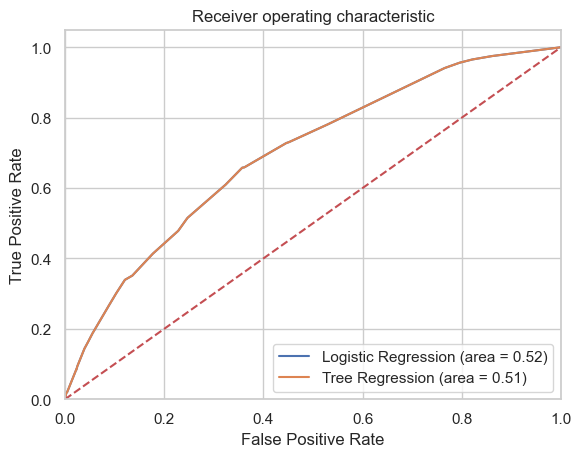

In [113]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
tree_roc_auc=roc_auc_score(y_test, dtree.predict(X_test))

fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
fpr, tpr, thresholds = roc_curve(y_test, dtree.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot(fpr, tpr, label='Tree Regression (area = %0.2f)' % tree_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()